In [68]:
import pandas as pd
import numpy as np

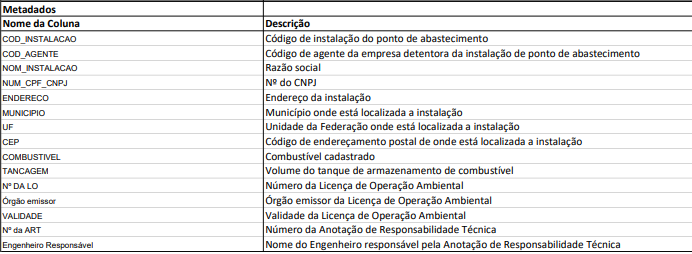

### Data Prep

In [288]:
# Importing data
df = pd.read_csv('postos.txt', dtype={"COD_INSTALACAO":"string"}, sep=';')

In [289]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Padronizando strings para uppercase
df['NOM_INSTALACAO'] = df['NOM_INSTALACAO'].str.upper()
df['ENGENHEIRO'] = df['ENGENHEIRO'].str.upper()
df['LICENCA'] = df['LICENCA'].str.upper()
df['DSC_ENDERECO'] = df['DSC_ENDERECO'].str.upper()
df['DSC_COMPLEMENTO'] = df['DSC_COMPLEMENTO'].str.upper()
df['MUNICIPIO'] = df['MUNICIPIO'].str.upper()
df['UF'] = df['UF'].str.upper()

# Casting
df['COD_ANOTACAO'] = df['COD_ANOTACAO'].astype('str')
df['COD_AGENTE_ENGENHEIRO'] = df['COD_AGENTE_ENGENHEIRO'].astype('str')


In [290]:
# Criando chave primaria para Licenca
df['aux'] = np.arange(0, df.shape[0])
df['COD_LICENCA'] = df.apply(lambda x: f'L{x.aux}', axis=1)
df.drop(columns={'aux'}, inplace=True)

# Criando chave primaria para Localidade
df['aux'] = np.arange(0, df.shape[0])
df['COD_LOCALIDADE'] = df.apply(lambda x: f'LO{x.aux}', axis=1)
df.drop(columns={'aux'}, inplace=True)

# Criando chave primaria para Combustivel
aux = df[['COMBUSTIVEL']].drop_duplicates().reset_index(drop=True)
aux['aux_col'] = np.arange(0, aux.shape[0])
aux['COD_COMBUSTIVEL'] = aux.apply(lambda x: f'C{x.aux_col}', axis=1)
aux.drop(columns={'aux_col'}, inplace=True)
df = df.merge(aux, left_on='COMBUSTIVEL', right_on='COMBUSTIVEL')

#### Entidades
- Instalação(Código, Nome, CPF_CNPJ, Endereço, Licença): 24787 instâncias  
- Endereço(Código, Instalação, Rua, Número, Complemento, Município): 2874  
instâncias 
- Combustível(Nome, Código, Tipo): 34 entidades
- Engenheiro(Código, Nome): 7600 entidades
- Licença(ID, Emissor, Validade): ?? entidades


In [291]:
df.columns

Index(['COD_INSTALACAO', 'COD_AGENTE', 'NOM_INSTALACAO', 'NUM_CPF_CNPJ',
       'DSC_ENDERECO', 'DSC_COMPLEMENTO', 'NUM_ENDERECO', 'MUNICIPIO', 'UF',
       'CEP', 'COMBUSTIVEL', 'TANCAGEM', 'LICENCA', 'EMISSOR', 'VALIDADE',
       'COD_ANOTACAO', 'COD_AGENTE_ENGENHEIRO', 'ENGENHEIRO', 'COD_LICENCA',
       'COD_LOCALIDADE', 'COD_COMBUSTIVEL'],
      dtype='object')

In [277]:
# Instalaçao
cols_instalacao = ['COD_INSTALACAO', 'NOM_INSTALACAO', 'NUM_CPF_CNPJ', 'LICENCA', 'COD_AGENTE_ENGENHEIRO', 'COD_LICENCA', 'COD_LOCALIDADE']
instalacao = df[cols_instalacao]
instalacao.head()

,COD_INSTALACAO,NOM_INSTALACAO,NUM_CPF_CNPJ,LICENCA,COD_AGENTE_ENGENHEIRO,COD_LICENCA,COD_LOCALIDADE
0,1258097,NELSON LUIS KRASTEL,3749365873,3EDE16D2D28686A3,475964,L0,LO0
1,1250693,STERICYCLE GESTAO AMBIENTAL LTDA,1568077001520,ISENTO,356627,L1,LO1
2,1258089,GUILHERME OLIVEIRA,8487708625,3EDE16D2D28686A3,475964,L2,LO2
3,1251079,AGENCIA LUCK VIAGENS E TURISMO LTDA,10866549000117,ISENTO,356627,L3,LO3
4,1291884,MATA NORTE ALIMENTOS LTDA,3912413000130,ISENTA,564373,L4,LO4


In [278]:
# Engenheiro
cols_engenheiro = ['COD_AGENTE_ENGENHEIRO', 'ENGENHEIRO']
engenheiro = df[cols_engenheiro].drop_duplicates()
engenheiro

,COD_AGENTE_ENGENHEIRO,ENGENHEIRO
0,475964,LEANDRO LUIZ GOES BICALHO
1,356627,GABRIEL MENDES FONSECA DOS SANTOS
4,564373,GABRIEL MENDES FONSECA DOS SANTOS
5,564375,GABRIEL MENDES FONSECA DOS SANTOS
6,564381,GABRIEL MENDES FONSECA DOS SANTOS
...,...,...
33230,292947,LUIZ ROBERTO CORREA
33235,317093,MARCUS VINICIUS DE OLIVEIRA PINTO
33239,248809,ACIR DEQUECH
33241,276938,MAURICIO AUGUSTO GARCIA


In [279]:
# Adicionando atributos
aux = df[['COD_AGENTE_ENGENHEIRO', 'ENGENHEIRO', 'MUNICIPIO', 'UF',]].groupby(['ENGENHEIRO', 'COD_AGENTE_ENGENHEIRO']).last()
aux.reset_index(inplace=True)
aux

# Agora precisamos inventar um enderço pra eles usando essa cidade como residencia

,ENGENHEIRO,COD_AGENTE_ENGENHEIRO,MUNICIPIO,UF
0,-,248976,MANHUACU,MG
1,-,564098,RODEIRO,MG
2,.,539018,CUIABA,MT
3,.,571881,DUQUE DE CAXIAS,RJ
4,...........................,326988,MARIANA,MG
...,...,...,...,...
9511,ÁLVARO K DE A SANTI,52825,TERESINA,PI
9512,ÁUREA DO PRADO BENEVENUTO,450429,ITAUNA,MG
9513,ÉDSON ALVES DE SOUSA,568055,SAO LUIS,MA
9514,ÉRICO RODRIGUES PAULO DOS SANTOS PEGO,451387,JACUTINGA,MG


In [251]:
# Localidade
cols_localidade = ['COD_LOCALIDADE', 'NUM_ENDERECO', 'MUNICIPIO', 'UF', 'CEP', 'DSC_ENDERECO', 'DSC_COMPLEMENTO']
localidade = df[cols_localidade]
localidade.head()

,COD_LOCALIDADE,NUM_ENDERECO,MUNICIPIO,UF,CEP,DSC_ENDERECO,DSC_COMPLEMENTO
0,LO0,50,PIRAJUBA,MG,38210000,RUA ANTONIO BERNADES DA SILVA PRIMO,PREDIAL
1,LO1,1000,MOGI MIRIM,SP,13803280,AVENIDA GERALDO POTYGUARA SILVEIRA FRANCO,
2,LO2,50,PIRAJUBA,MG,38210000,RUA ANTONIO BERNADES DA SILVA PRIMO,PREDIAL
3,LO3,338,JABOATAO DOS GUARARAPES,PE,54430585,RUA PROJETADA 2,
4,LO4,S/N,TIMBAUBA,PE,55870000,"ESTRADA DE ROSA E SILVA, KM 11",ENGENHO LIMOEIRINHO


In [252]:
# Licenca
cols_licenca = ['COD_LICENCA', 'LICENCA', 'EMISSOR', 'VALIDADE', 'COD_ANOTACAO']
licenca = df[cols_licenca]
licenca

,COD_LICENCA,LICENCA,EMISSOR,VALIDADE,COD_ANOTACAO
0,L0,3EDE16D2D28686A3,ANP,30/06/2020,14201100000000046823
1,L1,ISENTO,ANP,04/04/2021,PE20180226556
2,L2,3EDE16D2D28686A3,ANP,30/06/2020,14201100000000046823
3,L3,ISENTO,ANP,28/01/2020,PE20180341460
4,L4,ISENTA,ANP,02/01/1900,SI12436267ICT001
...,...,...,...,...,...
33246,L33246,NaN,NaN,NaN,92221220091827483
33247,L33247,NaN,NaN,NaN,123456
33248,L33248,NaN,NaN,NaN,3576007-5
33249,L33249,NaN,NaN,NaN,00000000000000000000


In [296]:
# Combustivel
cols_combustivel = ['COMBUSTIVEL', 'COD_COMBUSTIVEL']
combustivel = df[cols_combustivel].drop_duplicates().reset_index(drop=True)
combustivel = combustivel[['COD_COMBUSTIVEL'] + [col for col in combustivel.columns if col != 'COD_COMBUSTIVEL']]

# Display do dataframe
combustivel

,COD_COMBUSTIVEL,COMBUSTIVEL
0,C0,ÓLEO DIESEL B S10 - COMUM
1,C1,GASOLINA C COMUM
2,C2,ÓLEO DIESEL B S500 - COMUM
3,C3,ÓLEO DIESEL B S10 - ADITIVADO
4,C4,ÓLEO DIESEL B S500 - ADITIVADO
5,C5,ETANOL HIDRATADO COMUM
6,C6,ÓLEO DIESEL B S1800 NÃO RODOVIÁRIO - COMUM
7,C7,ÓLEO DIESEL B S50 - COMUM
8,C8,ÓLEO DIESEL B S50 - ADITIVADO
9,C9,DMA - MGO


In [297]:
# Adicionando atributos
def classe(x):
    if x.COMBUSTIVEL.upper().find('COMUM') != -1: return 'Comum'
    if x.COMBUSTIVEL.upper().find('ADITIVAD') != -1: return 'Aditivada'
    if x.COMBUSTIVEL.upper().find('PREMIUM') != -1: return 'Premium'
    if x.COMBUSTIVEL.upper().find('AVIAÇÃO') != -1: return 'Aviacao'
    return 'Desconhecido'

def tipo(x):
    if x.COMBUSTIVEL.upper().find('GASOLINA') != -1: return 'GASOLINA'.capitalize()
    if x.COMBUSTIVEL.upper().find('ETANOL') != -1: return 'ETANOL'.capitalize()
    if x.COMBUSTIVEL.upper().find('DIESEL ') != -1: return 'DIESEL '.capitalize()
    if x.COMBUSTIVEL.upper().find('QUEROSENE ') != -1: return 'QUEROSENE '.capitalize()
    return 'Especial'

combustivel['Classe'] = combustivel.apply(lambda x: classe(x), axis=1)
combustivel['Tipo'] = combustivel.apply(lambda x: tipo(x), axis=1)


In [298]:
combustivel

,COD_COMBUSTIVEL,COMBUSTIVEL,Classe,Tipo
0,C0,ÓLEO DIESEL B S10 - COMUM,Comum,Diesel
1,C1,GASOLINA C COMUM,Comum,Gasolina
2,C2,ÓLEO DIESEL B S500 - COMUM,Comum,Diesel
3,C3,ÓLEO DIESEL B S10 - ADITIVADO,Aditivada,Diesel
4,C4,ÓLEO DIESEL B S500 - ADITIVADO,Aditivada,Diesel
5,C5,ETANOL HIDRATADO COMUM,Comum,Etanol
6,C6,ÓLEO DIESEL B S1800 NÃO RODOVIÁRIO - COMUM,Comum,Diesel
7,C7,ÓLEO DIESEL B S50 - COMUM,Comum,Diesel
8,C8,ÓLEO DIESEL B S50 - ADITIVADO,Aditivada,Diesel
9,C9,DMA - MGO,Desconhecido,Especial


#### Adicionando atributos ...

In [41]:
import requests